# *Capstone Project: Customer Segmentation*

Welcome to the project! This capstone project is an opportunity for you to analyze customer transaction dataset in order to investigate and interpret customer behaviour of a certain supplier. As a hint visualize by clustering the customers based on their behaviour. The Dataset comprises annual spending across different types of retail products (for example, Frozen, Grocery, Delicatessen, etc.).***Your job is to give insights on customer behaviour by performing Customer Segmentation.*** 

## Task A :- Understand your Data

**Import Packages and Load the data**

Write your Code :-

In [1]:
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\durga\OneDrive\Documents\Python Scripts\Cus_Seg\Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**1Q. What did you understand from the data? you wanna make any changes ?**

**Type your Answer :-** It is a Multivariate Data. Except Categorical Variables like Channel and Region, remaining all were Continuous Variables. Delicatessen was mispelled as Delicassen. ***So it has to be renamed into Delicatessen.*** It is really hard to understand which product transactions came from which Region via which channel. So to make the data understandable following representations should be made as changes in the data :- ***Channel 1 :*** *HoReca*, ***Channel 2 :*** *Retail*, ***Region 1 :*** *Lisbon*, ***Region 2 :*** *Porto*, ***Region 3 :*** *Others* .  

Write your Code :-

In [3]:
df = df.rename(columns={'Delicassen': 'Delicatessen'})
df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'})
df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3:'Other'})

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


**2Q. How does the distribution of channels vary across different regions?**

Write your Code :-

In [5]:
df.groupby('Region')['Channel'].value_counts().unstack()

Channel,HoReCa,Retail
Region,,
Lisbon,59,18
Other,211,105
Porto,28,19


**Get a list of columns and Feature coloumn for future use**

Write your Code :-

In [6]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [7]:
features = ['Channel',
             'Region',
             'Fresh',
             'Milk',
             'Grocery',
             'Frozen',
             'Detergents_Paper',
             'Delicatessen']
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

**Perform summary Statistics**

Write your Code :-

In [8]:
df[features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Task B :-  EDA

**Get the distribution of each variable**

Write your Code :-

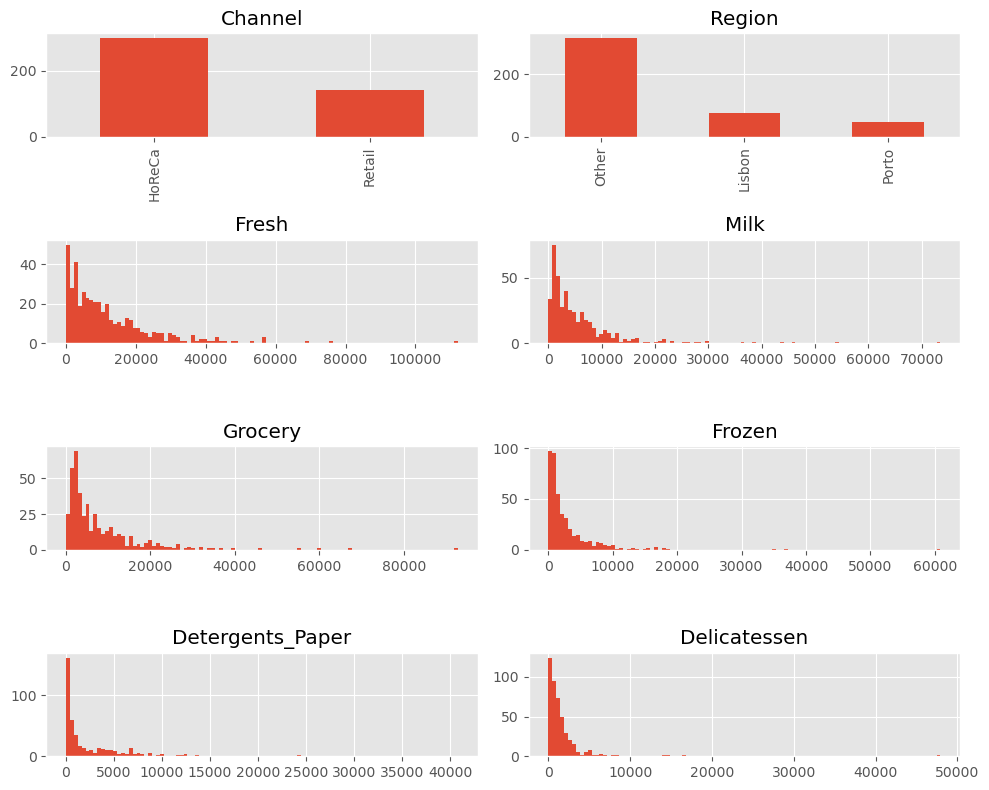

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(10, 8))

for feature, ax in zip(features, axes.ravel()):
    if (feature=='Channel') | (feature=='Region'):
        df[feature].value_counts().plot.bar(ax=ax)
    else:
        ax.hist(df[feature], bins=100)
    ax.set_title(feature)
plt.tight_layout()

**Plot a pair plot to get a broad overview of correlation between different variables.**

Write your Code :-

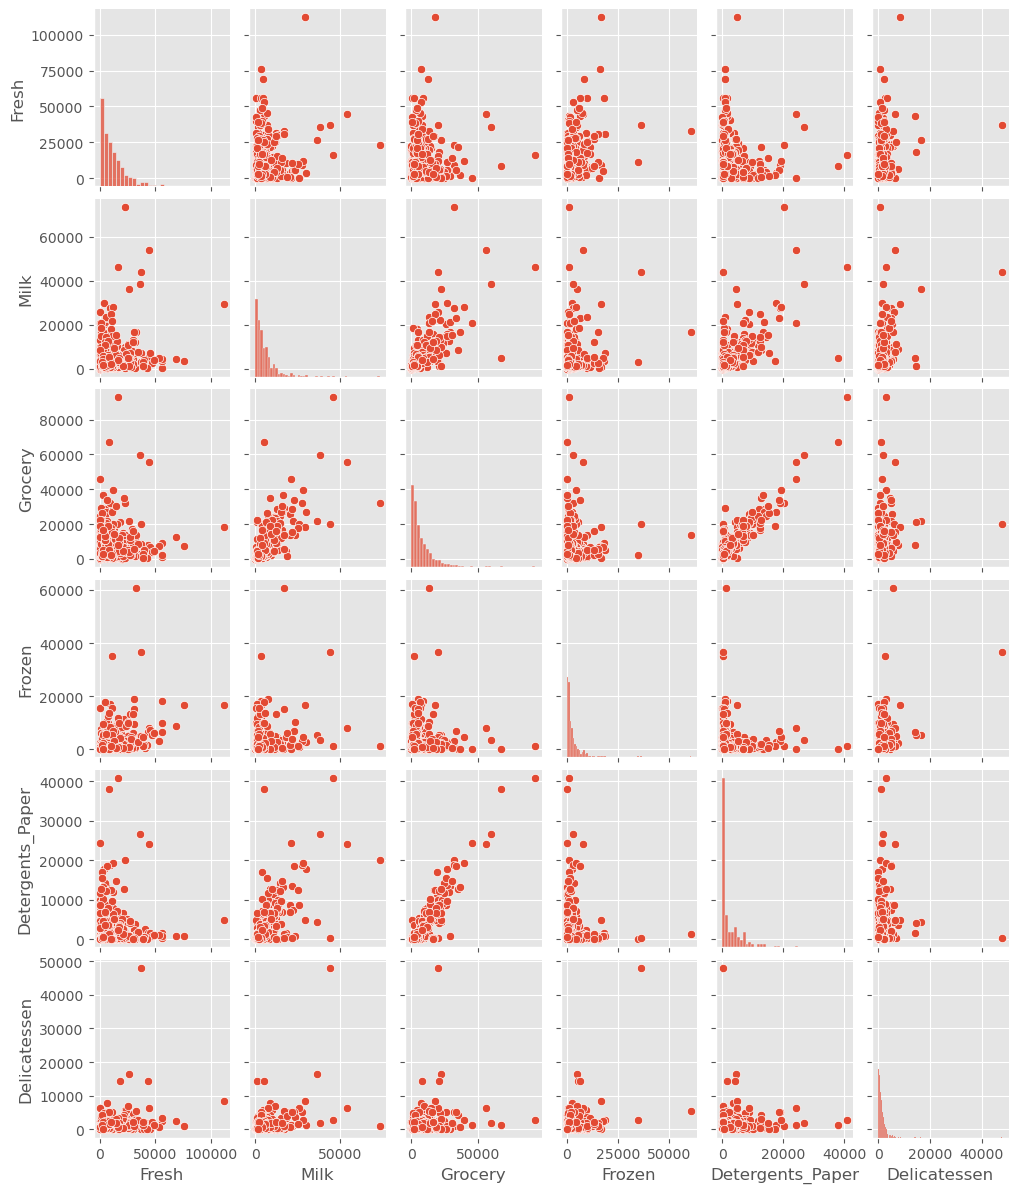

In [10]:
pplot = sns.pairplot(df, vars=features[2:])
pplot.fig.set_size_inches(10,12)

**3Q. What do you infer ?**

**Type your Answer :-** Hardly I found only one strong linear correlationship, which is between variable Groceries and Detergents_paper. Across the diagnol I can see normal distributions. No clear trends or insights can be drawn from the pair plot.    

**4Q. What is your future step and why ?**

Write your code and answer below :- 

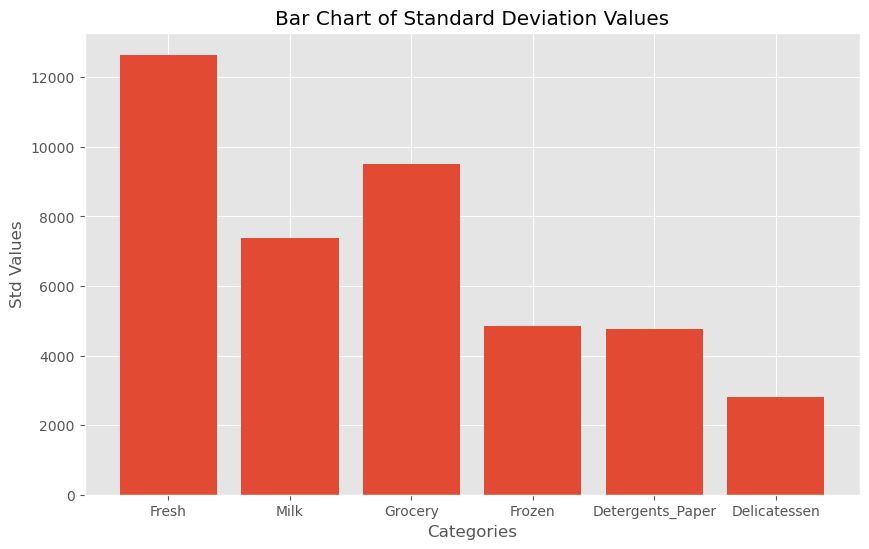

In [11]:
selected_columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
df_selected = df[selected_columns]

# Calculating std values for the selected columns
std_values = df_selected.std()
categories = df_selected.columns

# Creating a bar chart of std values for the selected columns
plt.figure(figsize=(10,6))
plt.bar(categories, std_values)
plt.title('Bar Chart of Standard Deviation Values')
plt.xlabel('Categories')
plt.ylabel('Std Values')
plt.show()

I can see variance values vary so much after comparing the variables. I think ,in the context of correlation, higher variability in either or both variables can weaken the correlation coefficient. This is because higher variability means there's less consistency in the relationship between the variables, making it harder to discern a clear pattern or trend. **So my further step would be performing Principal Component Analysis on the data set, because briefly PCA is a unsupervised ML algorithm heavily based on variance concept to reveal underlying structures and relationships in the data.**

## Task C: Principal Component Analysis

**Import relevant packages to perform PCA**

Write your Code :-

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Specify on which particular variables you wanna perform PCA**

Write your Code :-

In [13]:
features = ['Fresh',
             'Milk',
             'Grocery',
             'Frozen',
             'Detergents_Paper',
             'Delicatessen']
features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

**5Q. What is Dimensionality of your Dataset ?**

Write your Code :-

In [14]:
data = df[features].to_numpy()
data.shape

(440, 6)

**Standardize the data and show it**

Write your Code :-

In [15]:
# Creating a new DataFrame called 'data' containing only those selected columns.
data = df[features]

# Creating an instance of the StandardScaler class from the sklearn.preprocessing module.
scaler = StandardScaler()

# Computing the mean and standard deviation for each feature in the data and then Standardizing the data
data = scaler.fit_transform(data)

# Calculating the Standard deviation of the first column (feature) in the standardized data array. 
print(data[:, 0].std(),'\n')

# Array of Six Dimensional Data points
data

1.0 



array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

**6Q. What do you mean by Standardization ?**

**Type your Answer :-** Standardization involves transforming the data such that it has a mean of 0 and a standard deviation of 1 for each feature by subtracting the mean and dividing by the standard deviation.

**Perform PCA**

Write your Code :-

In [16]:
# Defining the Principal Components, such that  data will be reduced to two dimensions.
pca = PCA(n_components=2)

# Transforming the data into 2 dimensional space
res_pca = pca.fit_transform(data)

**Now Visualize the scatter plot for each feature**

Write your Code :-

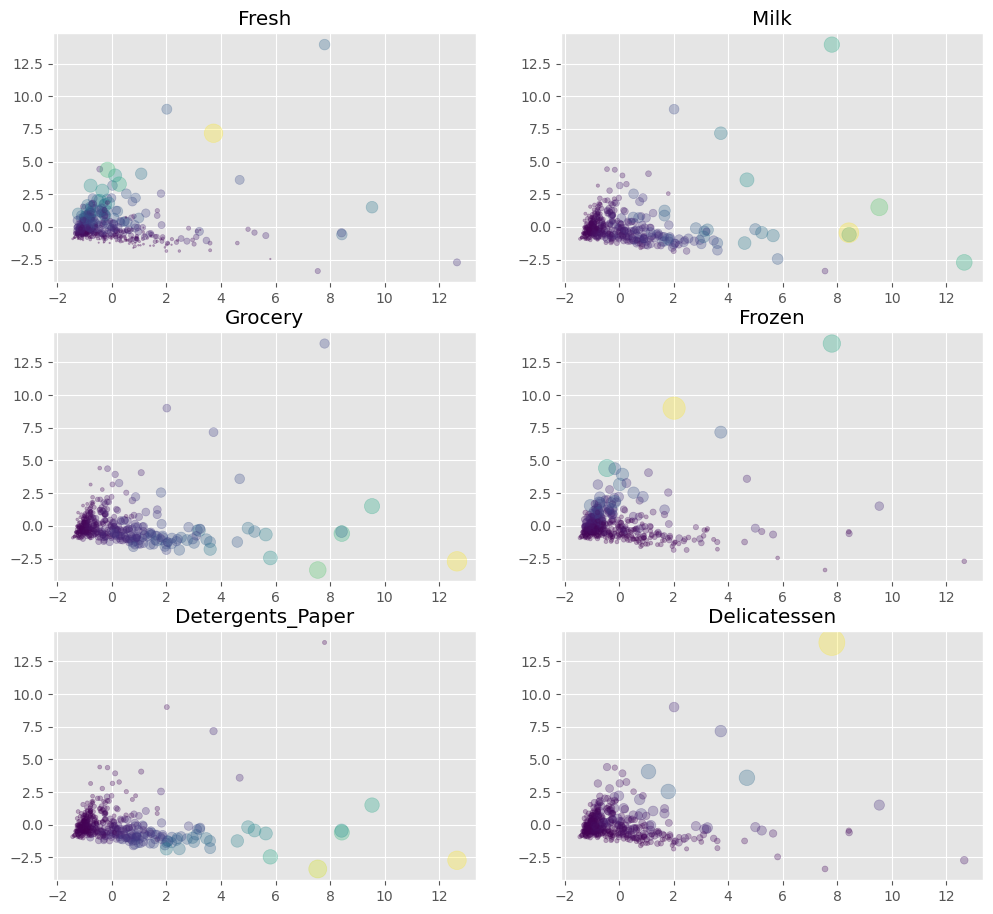

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(12, 11))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)

**7Q. What do you infer and what is your further step ?**

**Type your Answer :-** I can see, the small points are reflecting small values and vice versa for any feature scatter plot. For example, values in frozen scatter plot, specifically the yellow sample one is the biggest value being, further away from this large purple cluster of information and one can see the same thing for detergents and paper, sort of in this direction. As one goes out of the cluster the magnitude of the samples increase and hence the color changes.Yet not much information is revealed, because drawing a line through each feature scatter plot would cut all the clusters in respective plot. As the clusters aren't appeared to be seperated in their respective scatter plots, this resembles non linear relationship. **So I would perform Kernel Principal Component Analysis (KCPA) as my next step.**

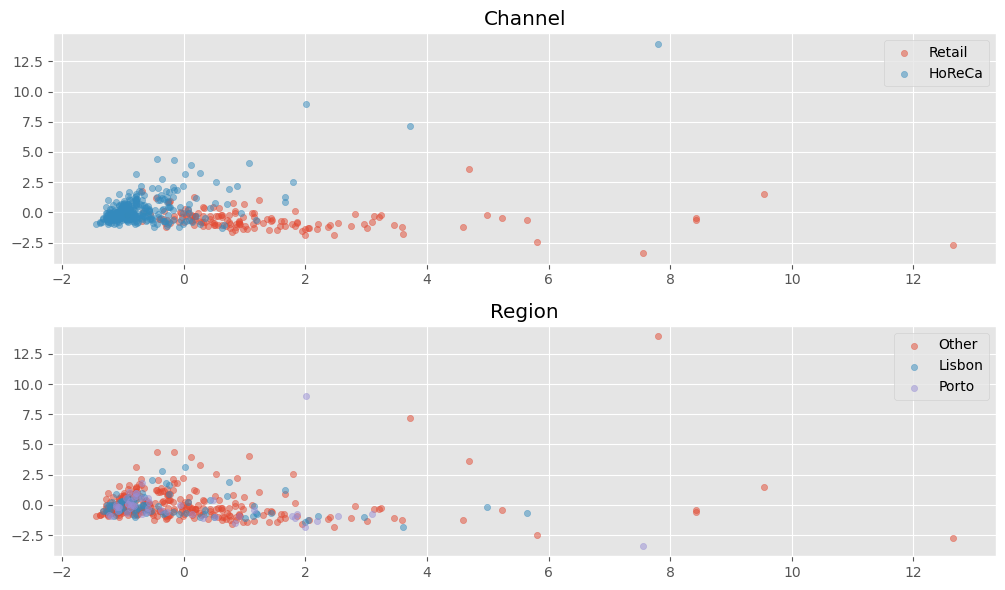

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
for feature, ax in zip(['Channel', 'Region'], axes.ravel()):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(
            res_pca[df[feature]==unique_val, 0],
            res_pca[df[feature]==unique_val, 1],
            s = sizes, alpha = 0.5,
            label = unique_val
        )
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()

**8Q. What do you infer and what is your further step ?**

**Type your Answer :-** I can see the channel, which is retails, sort of being clustered at the location  towards the bottom, while hotel, restaurant and cafe sort of on the top. But then unfortunately, except for other regions, Lisbon and porter, everything sort of mixed up. This would sort of suggest that according to PCA, there's no really difference according to where the sort of the shop is air coming from. So all our supplier is not really having a big difference according to with where the shop is coming from. **So I would perform Kernel Principal Component Analysis (KCPA) as my next step.**

## Task D: Kernel Principal Component Analysis

**Import relevant paclages to perform KPCA**

Write your Code :-

In [19]:
from sklearn.decomposition import KernelPCA

***Now use Polynomial, Radial and Cosine kernels of KPCA and choose the best Kernel among that captures the hidden non linear relationship***

Write your Code :-

## Polynomial Function

In [20]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=2)
res_kpca_poly = kpca.fit_transform(data)

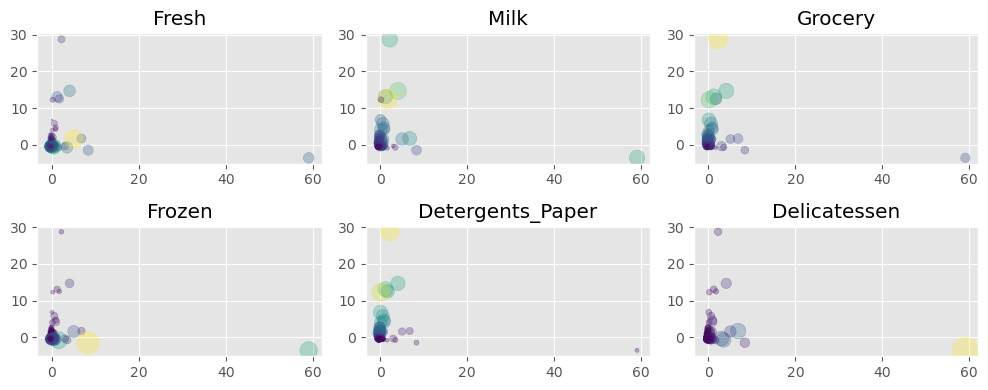

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(10, 4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

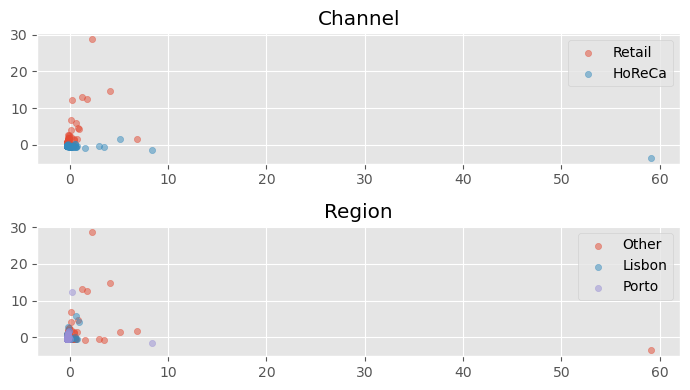

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_poly[df[feature]==unique_val, 0], res_kpca_poly[df[feature]==unique_val, 1], s=20, alpha=0.5,
            label = unique_val)
        
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()

**9Q. What do you infer ?**

**Type your Answer :-** Still I can see the messy mixture of clusters at bottom left of every feature scatter plot.

## Radial Basis Function

In [23]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
res_kpca_rbf = kpca.fit_transform(data)

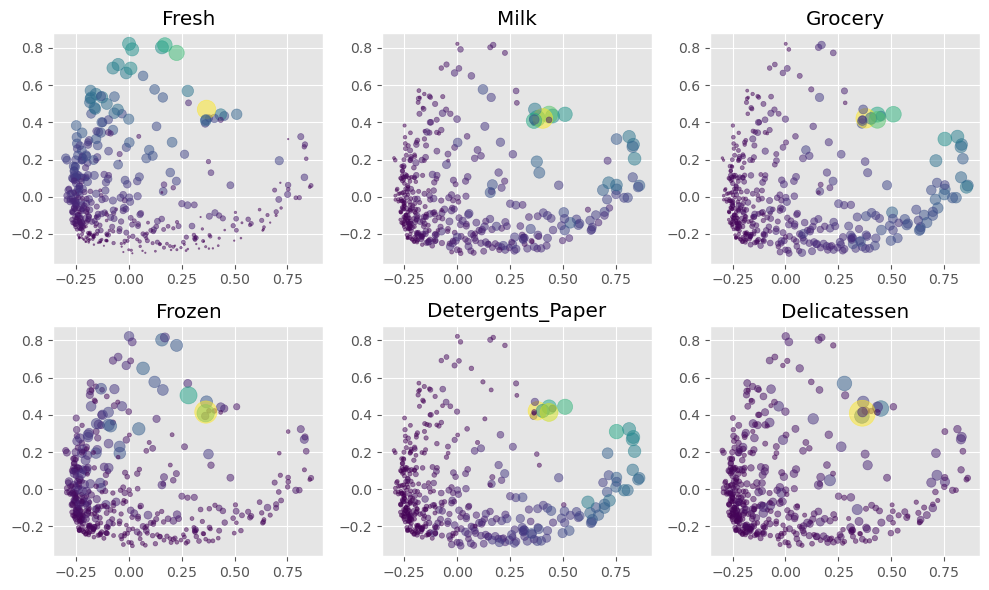

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.5, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

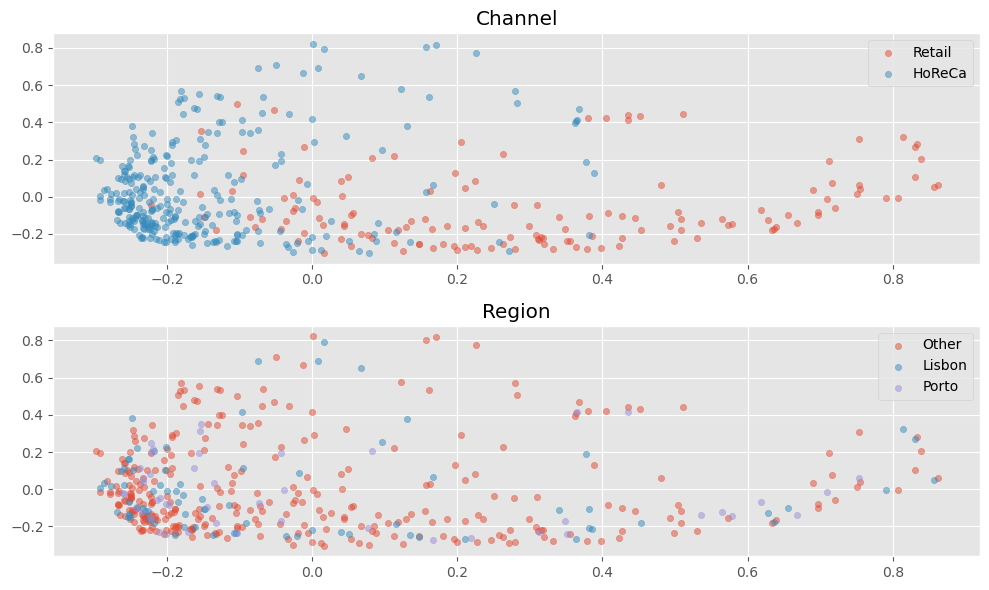

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_rbf[df[feature]==unique_val, 0], res_kpca_rbf[df[feature]==unique_val, 1], s=20, alpha=0.5,
            label = unique_val)
        
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()

**10Q. What do you infer ?**

**Type your Answer :-** I can clearly see **Radial basis function** is far more better than **Pair plot** and **Polynomial Function** in revealing hidden non linear relationships that is seperating cluSters. There is a transition across the variables, which is an indication of good performance. So the bigger the circle, higher the closer it is to yellow circle and bigger the value is for that specific customer. The area where the yellow circle is there, always has very high spending customers. Specifically within sort of this upper area on **Fresh**, within upper left area of **Frozen**, towards the middle right area of **Milk** and towards right area of **Detergents** and **Groceries** there is a cluster totally seperated from other clusters. Still there is a mixture of very few clusters at bottom left of every feature scatter plot. There is a messy cluster seperation for **Channel** and **Region** didn't work well at all.

Write your Code :-

## Cosine Function

In [26]:
# Specifying the dimensionality and Kernel function
kpca = KernelPCA(n_components=2, kernel='cosine')

# Transforming the data into lower dimensional space
res_kpca_cos = kpca.fit_transform(data)

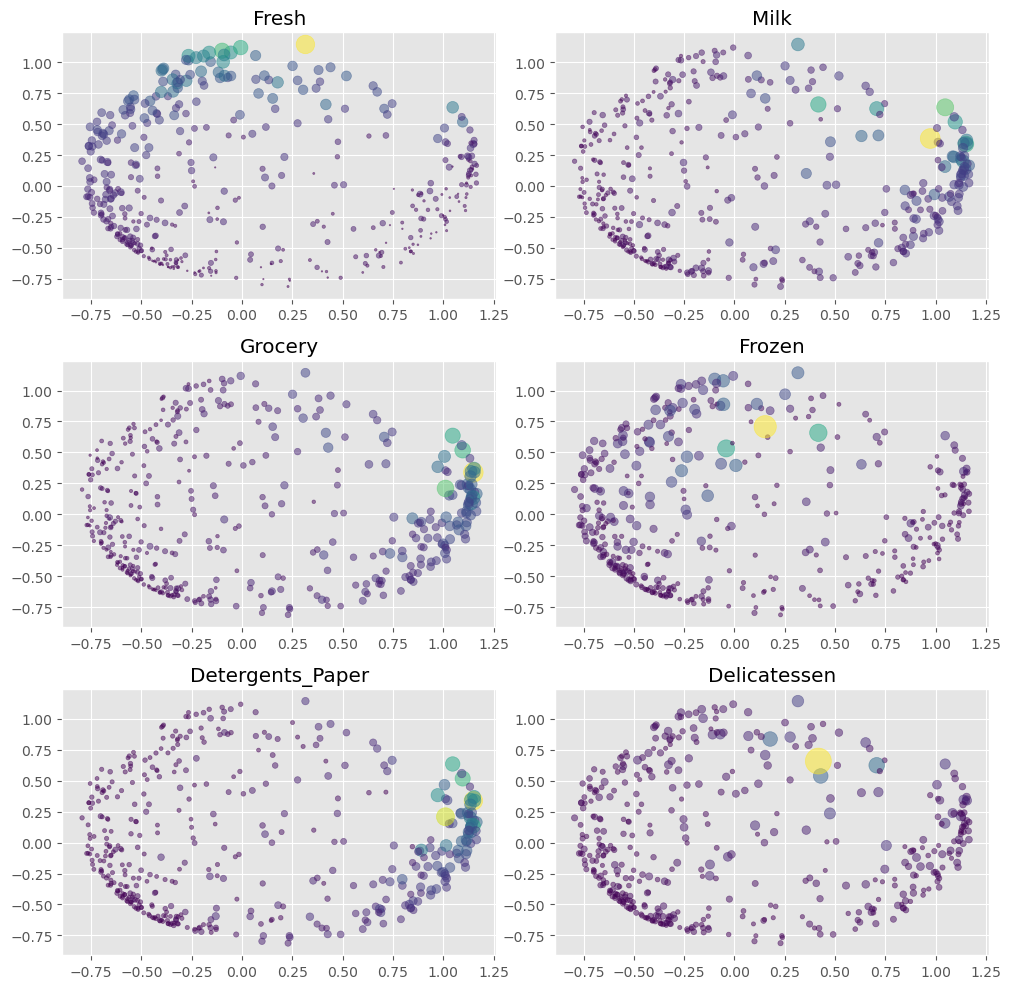

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Starting a loop that iterates over pairs of feature 
for feature, ax in zip(features, axes.ravel()):
    
    # Defining the color of the color map
    cols = 'viridis'
    
    # Scaling the values of the feature to a range
    # Calculateing the sizes of the scatter plot points based on the values of a specific feature.
    sizes = 20+20*data[:, features.index(feature)]
    
    # Createing a scatter plot on the current axes (ax) using the transformed data from Kernel PCA (res_kpca_cos).
    ax.scatter(res_kpca_cos[:, 0], res_kpca_cos[:, 1], s=sizes, alpha=0.5, c=df[feature], cmap=cols)
    
    ax.set_title(feature)
plt.tight_layout()

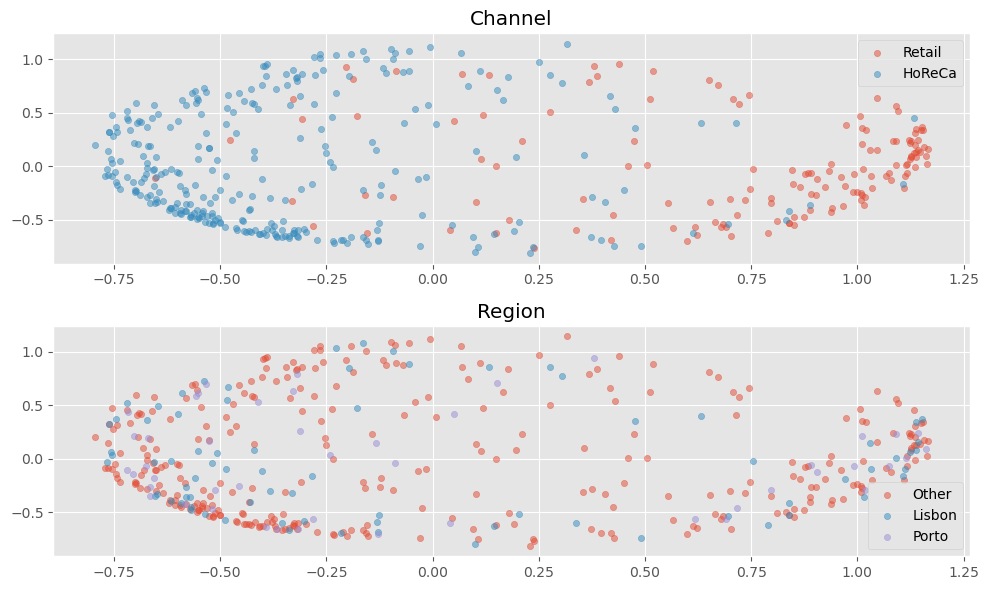

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_cos[df[feature]==unique_val, 0],
                   res_kpca_cos[df[feature]==unique_val, 1],
                   s=20, alpha=0.5,
                   label = unique_val)
        
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()

**11Q. What do you infer ?**

**Type your Answer :-** I can sense **4 - 5** clusters in each scatter plot.There is an increase of samples from small to big (transition) in different regions of every feature scatter plot. For example, In grocery, starting from middle left, going both in clock and anti-clock wise directions, there is a transition of samples from small to big. There is a similar approach of transition established for **Delicatessen, Fresh and Frozen**. 
Another similar type of transition established for **Milk, Detergents and Groceries.** Though **Channel** clusters wwere seperated well, **Region** didn't work well. **Cosine function** seperated the clusters well as compared to **Radial Basis function.**


**12Q. So which Kernel's reduced data points you want to append to the data frame for further analysis ?**

Write your Code :-

In [29]:
df['x_kpca_cos'] = res_kpca_cos[:, 0]
df['y_kpca_cos'] = res_kpca_cos[:, 1]

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_cos,y_kpca_cos
0,Retail,Other,12669,9656,7561,214,2674,1338,0.504789,0.009622
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.889941,-0.262833
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.473994,0.235687
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.618611,0.370131
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.068900,0.861829


## Task E: K-Means Clustering

**Import relevant packages to perform K-Means Clustering**

Write your Code :-

In [30]:
import numpy as np

import plotly.graph_objects as go

from sklearn.cluster import KMeans

**Perform K - Means Clustering**

Write your Code :-

In [31]:
# Extracting the 'x_kpca_cos' and 'y_kpca_cos' columns from the df and converting them into a NumPy array
res_kpca = df[['x_kpca_cos', 'y_kpca_cos']].to_numpy()

In [32]:
import warnings
warnings.filterwarnings("ignore")

# Creating clustering algorithm using 5 clusters, such that algorithm runs 10 times and selects the best output
clusterer = KMeans(n_clusters=5, n_init = 10)

# Fitting the clustering model to the data (res_kpca) and assigning each data point to a cluster.
# Predicting the cluster index for each sample.
clusters = clusterer.fit_predict(res_kpca)

In [33]:
# Creating a list of marker styles that differentiates clusters visually
markers = list('*hH+xXDd|.,ov^<>12348spP')

**Visualize the clusters obtained from KMeans clustering on your Kernel PCA-transformed data**

Write your Code :-

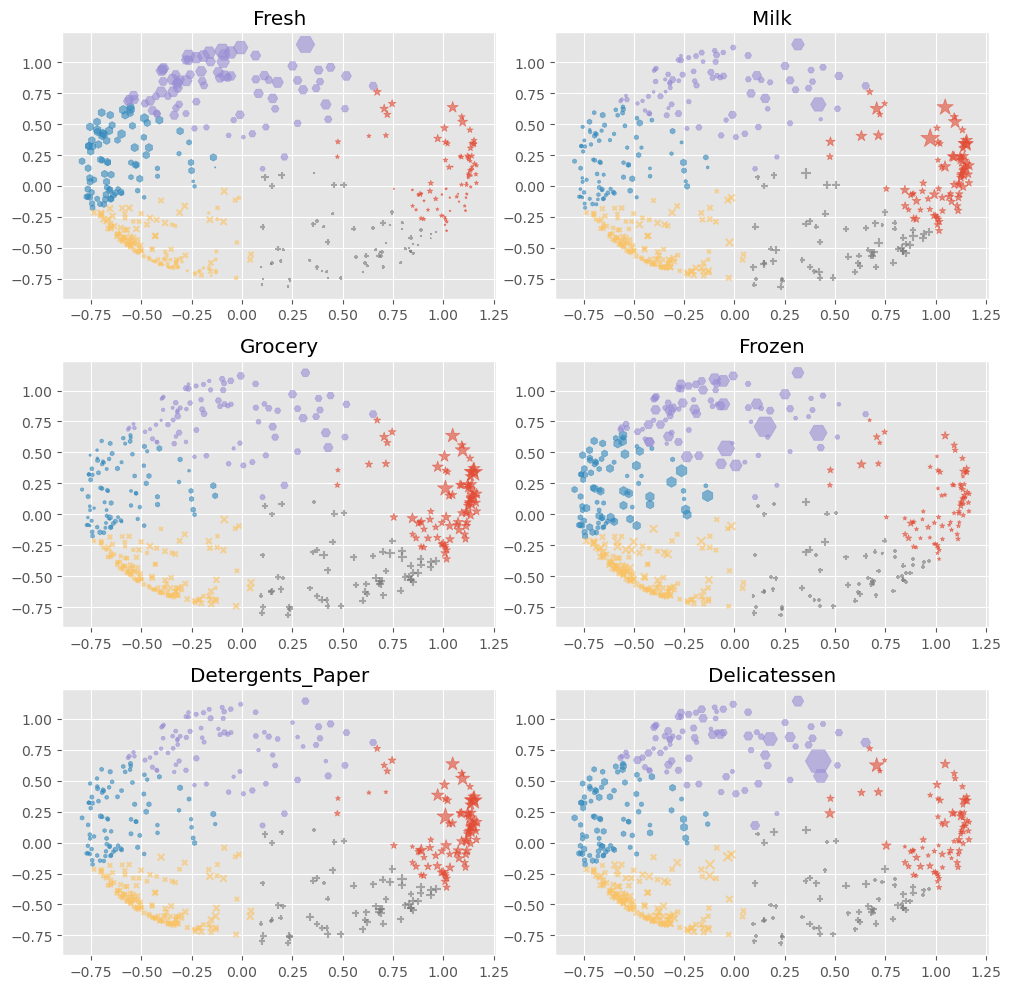

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    
    for cluster in np.unique(clusters):
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        cluster_data = res_kpca[clusters==cluster]
        
        ax.scatter(cluster_data[:, 0],
                   cluster_data[:, 1],
                   s=sizes, alpha=0.6, cmap=cols,
                   marker=markers[cluster],
                   label=f'Cluster {cluster}')
        
    ax.set_title(feature)
plt.tight_layout()

**13Q. What do you infer ?**

**Type your Answer :-** So there are five different types of customers while purchasing the products 

## Task F : Get More Insights

**Perform Cluster Distribution**

Write your Code :-

In [35]:
df['cluster_kpca_cos'] = clusters
df.groupby(['cluster_kpca_cos', 'Channel', 'Region'])[features].mean()

Fresh          Milk       Grocery  \
cluster_kpca_cos Channel Region                                             
0                HoReCa  Lisbon   6364.666667  17421.333333  11328.333333   
                         Other   11908.500000  15602.500000  14858.000000   
                 Retail  Lisbon   4302.166667  13440.833333  23713.250000   
                         Other    9260.603774  15728.924528  22173.962264   
                         Porto    4998.900000  12905.200000  23565.600000   
1                HoReCa  Lisbon  15022.055556   1949.166667   2459.388889   
                         Other   14973.352941   1907.509804   2390.274510   
                         Porto   12720.846154   1570.076923   3646.076923   
                 Retail  Other   16085.666667   3109.666667   4594.000000   
2                HoReCa  Lisbon  35193.000000   4892.444444   6189.333333   
                         Other   32018.096154   5519.519231   5693.903846   
                         Porto   29443.000000   7568.666667   8123.333333   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   23938.461538   6279.923077   9520.230769   
                         Porto   20117.666667   4662.666667   6631.000000   
3                HoReCa  Lisbon   3218.333333   7438.166667   7476.500000   
                         Other    2835.500000   6629.625000   8714.687500   
                 Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                         Other    4539.060606   6606.030303  10429.969697   
                         Porto    3121.500000   6622.250000  10607.750000   
4                HoReCa  Lisbon   5899.782609   2275.304348   2553.260870   
                         Other    4783.355556   2379.733333   2588.477778   
                         Porto    6042.916667   1783.500000   4275.416667   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   10750.000000   3468.666667   6065.333333   
                         Porto    7839.000000   2548.000000   6110.000000   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_cos Channel Region                                                
0                HoReCa  Lisbon   5405.000000       2735.000000   3096.333333  
                         Other    3388.000000       2680.500000   3507.000000  
                 Retail  Lisbon   2153.000000      10679.750000   2188.833333  
                         Other    1778.943396       9987.754717   2207.358491  
                         Porto    1106.200000      12201.800000   1326.400000  
1                HoReCa  Lisbon   3691.166667        341.500000    925.388889  
                         Other    3780.823529        417.392157    806.803922  
                         Porto    5650.307692        428.461538   1125.923077  
                 Retail  Other    1181.666667       1537.000000   1096.333333  
2                HoReCa  Lisbon   6391.555556        569.555556   2702.222222  
                         Other    7774.538462        865.076923   3372.961538  
                         Porto   22094.666667        594.333333   2272.666667  
                 Retail  Lisbon   5040.000000       1761.500000   1845.000000  
                         Other    2133.923077       2765.538462   2451.846154  
                         Porto    4582.666667       2368.333333   2543.333333  
3                HoReCa  Lisbon   1071.666667       2718.500000    960.000000  
                         Other    1316.000000       2991.125000   1075.000000  
                 Retail  Lisbon   1662.000000       5195.666667    793.000000  
                         Other     909.454545       4387.848485   1169.393939  
                         Porto     647.250000       6188.000000    465.500000  
4                HoReCa  Lisbon   1647.913043        882.260870    635.043478  
                         Other    1629.7333

**Perform Boxplot Analysis and make more meaningful decisions**

Write your Code :-

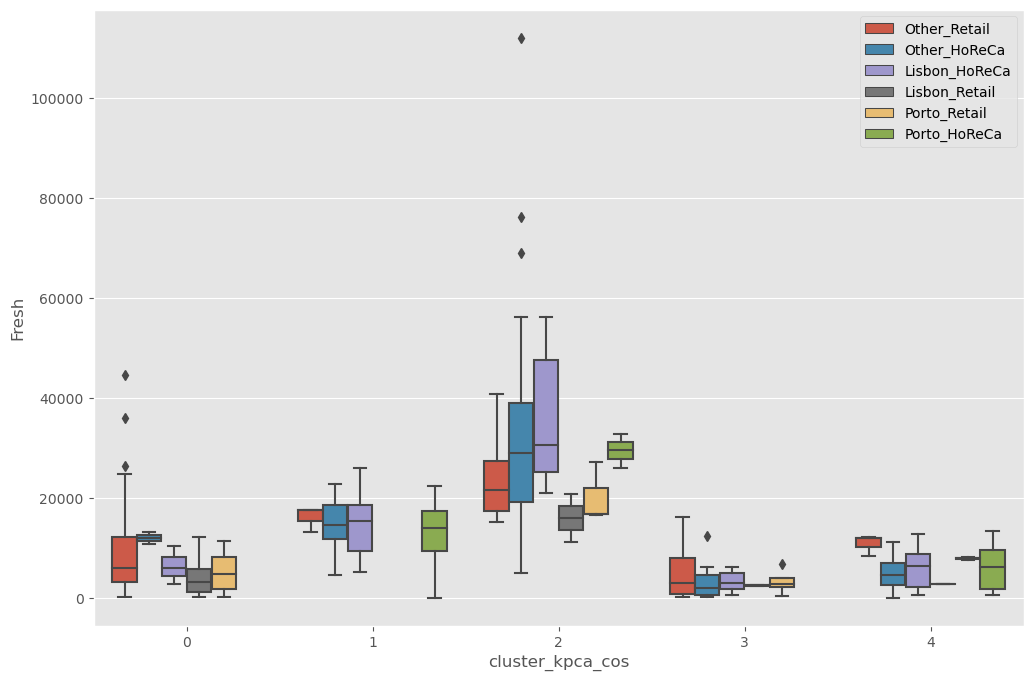

In [36]:
plt.figure(figsize=(12, 8))

df['Region_Channel'] = df['Region'] + '_' + df['Channel']

sns.boxplot(x='cluster_kpca_cos', y='Fresh', hue='Region_Channel', data=df)

plt.legend(loc='upper right')
plt.show()

**14Q. What do you infer ?**

**Type your Answer :-** On an average **Fresh Products** are more purchased from **Lisbon region** via **Hotel/Restuarants/Cafes** by customers of **cluster 0**. So its a important to consider the decision of inducing fresh product in Hotel/Restuarants/Cafes of Lisbon region while targeting Cluster 0 customers.

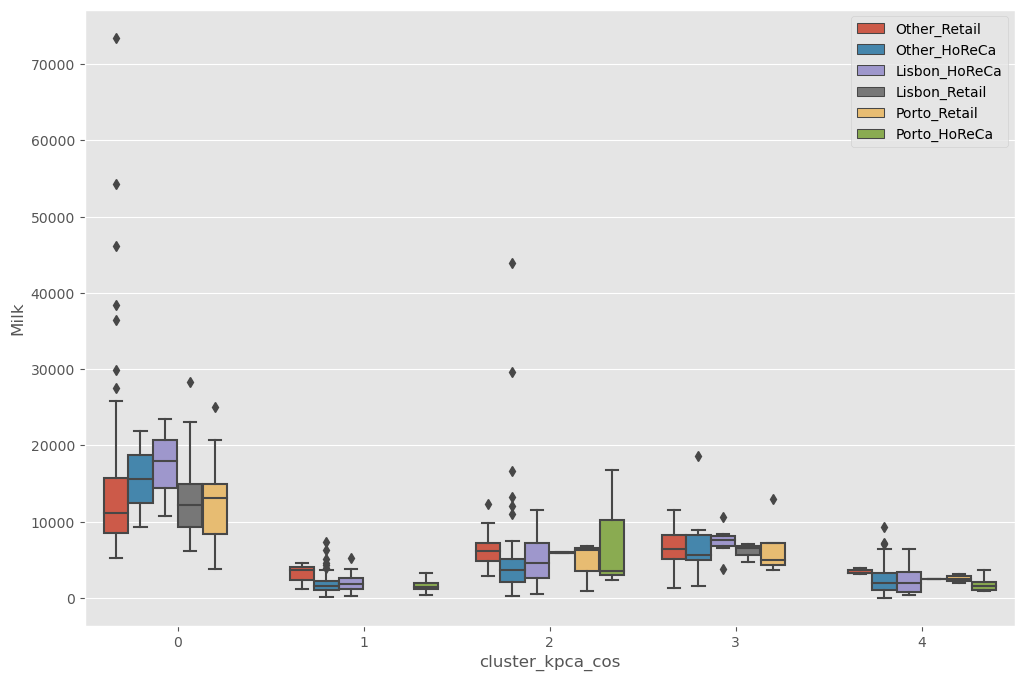

In [37]:
plt.figure(figsize=(12, 8))

df['Region_Channel'] = df['Region'] + '_' + df['Channel']

sns.boxplot(x='cluster_kpca_cos', y='Milk', hue='Region_Channel', data=df)

plt.legend(loc='upper right')
plt.show()

**15Q. What do you infer ?**

**Type your Answer :-** On an average **Milk** is more purchased from **Lisbon region** via **Hotel/Restuarants/Cafes** by customers of **cluster 2**. So its important to consider the decision of making Milk more available in Hotel/Restuarants/Cafes of Lisbon region while targeting Cluster 2 customers.

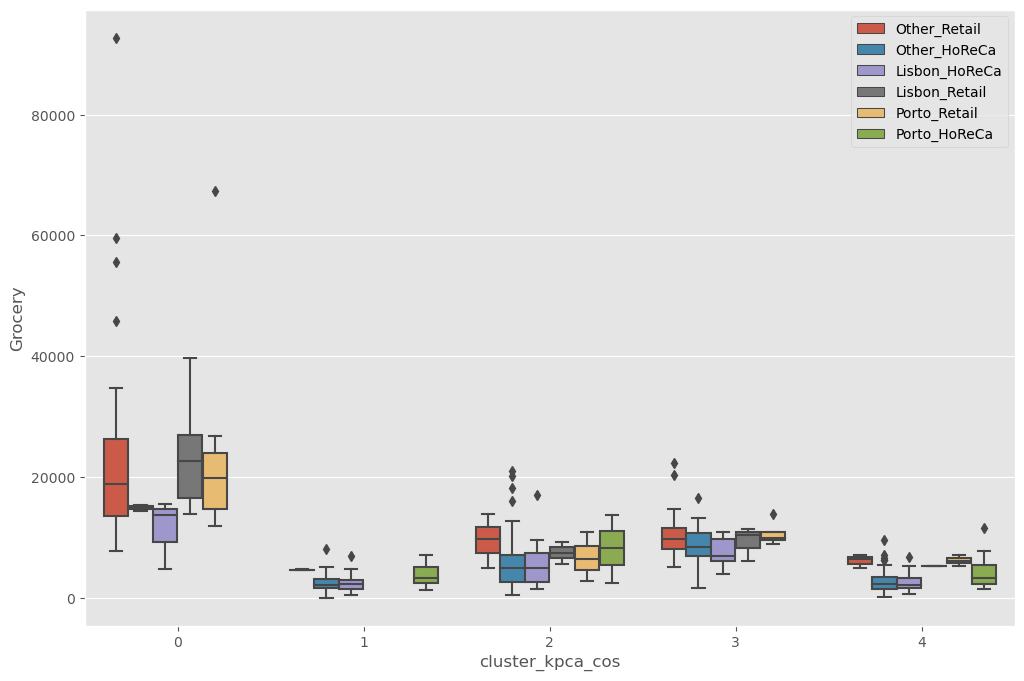

In [38]:
plt.figure(figsize=(12, 8))

df['Region_Channel'] = df['Region'] + '_' + df['Channel']

sns.boxplot(x='cluster_kpca_cos', y='Grocery', hue='Region_Channel', data=df)

plt.legend(loc='upper right')
plt.show()

**16Q. What do you infer ?**

**Type your Answer :-** On an average **Groceries** are more purchased from **Lisbon region** via **Retail** by customers of **cluster 2**. So its important to consider the decision of making Groceries more available via Retail in Lisbon region, while targeting Cluster 2 customers.

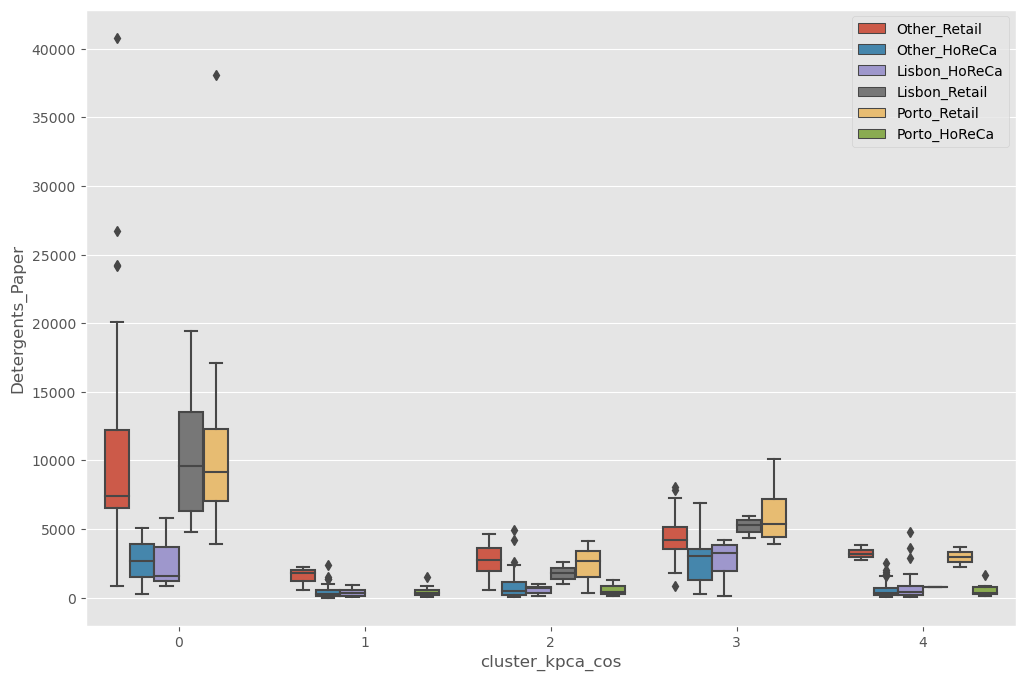

In [39]:
plt.figure(figsize=(12, 8))

df['Region_Channel'] = df['Region'] + '_' + df['Channel']

sns.boxplot(x='cluster_kpca_cos', y='Detergents_Paper', hue='Region_Channel', data=df)

plt.legend(loc='upper right')
plt.show()

**17Q. What do you infer ?**

**Type your Answer :-** On an average **Detergents** are more purchased from **Lisbon region** via **Retail** by customers of **cluster 2**. So its important to consider the decision of making more Detergents available via Retail in Lisbon region, while targeting Cluster 2 customers.

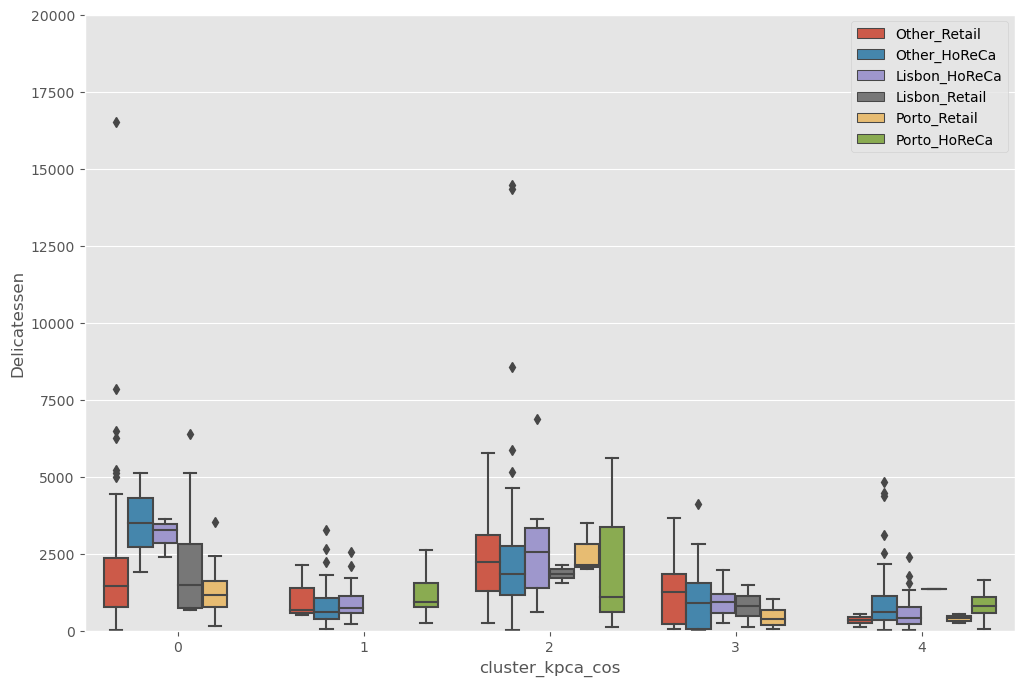

In [40]:
plt.figure(figsize=(12, 8))

df['Region_Channel'] = df['Region'] + '_' + df['Channel']

sns.boxplot(x='cluster_kpca_cos', y='Delicatessen', hue='Region_Channel', data=df)

plt.legend(loc='upper right')
plt.ylim(0,20000)
plt.show()

**18Q. What do you infer ?**

**Type your Answer :-** On an average **Meat products/Delicatessen** are more purchased from **other regions** via **Hotel/Restuarants/Cafes** by customers of **cluster 2**. 

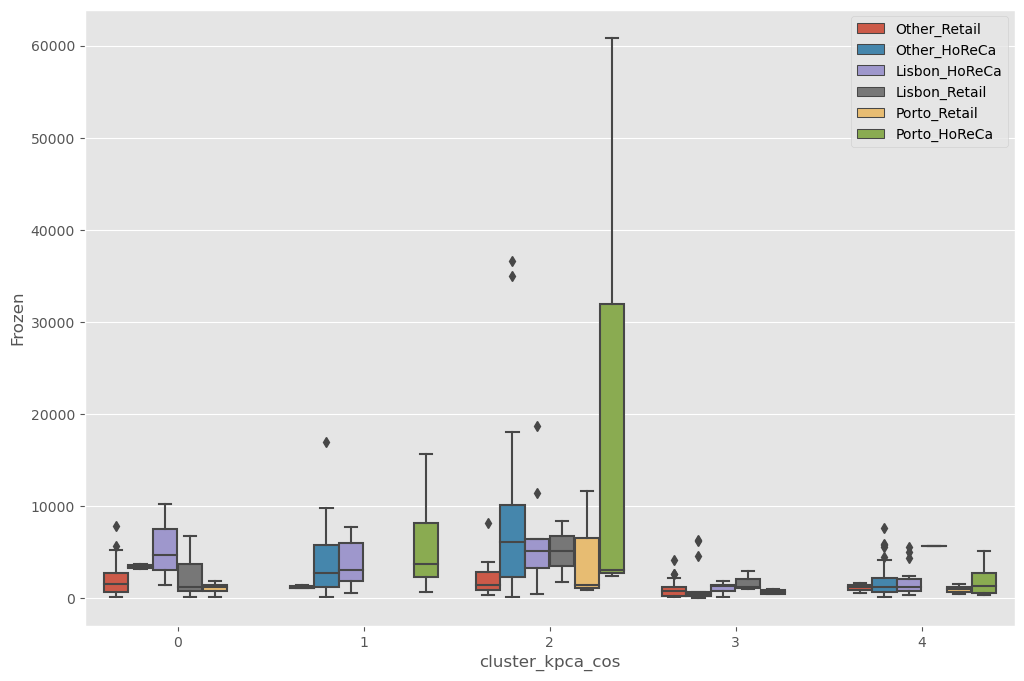

In [41]:
plt.figure(figsize=(12, 8))

df['Region_Channel'] = df['Region'] + '_' + df['Channel']

sns.boxplot(x='cluster_kpca_cos', y='Frozen', hue='Region_Channel', data=df)

plt.legend(loc='upper right')
plt.show()

**19Q. What do you infer ?**

**Type your Answer :-** On an average **Frozen products** are more purchased from **Porto region** via **Hotel/Restuarants/Cafes** by customers of **cluster 0**. So its important to consider the decision of making Ice creams, cheese, and perisgables more available in Hotel/Restuarants/Cafes of Port0 region while targeting Cluster 0 customers.

**20Q. What are your Final Insights ?**

**Type your Answer :-** After analyzing the Customer Transactin Dataset, there are ***5 types of customers***. Customers of **Cluster 0** and **Cluster 2** made heavy transactions , especially Cluster 2 customers. On an average Meat Products are least purchased by Cluster 2 customers. I feel it is important to target Cluster 2 customers of the ***Lisbon region*** who purchse products like Milk (via Ho/Re/Ca), ***Groceries*** and ***Detergents*** via ***Retail***. 2nd priority to be given for Cluster 0 customers of Porto region who purchase ***Frozen*** Products via Hotel/Restuarants/Cafes, because remaining clusters of customers are least purchased of Frozen products. 3rd priority to be given for Cluster 0 customers of Lisbon region who purchase Fresh Products via ***Hotel/Restuarants/Cafes.*** 